Project Number 2: Titanic     
Lee Eisenberg, ShaoYang Li

There are many null values in age, cabins and embarked. Age and embarked don't have too many null values, but cabin has too many to be very useful.     

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
dfTrain = pd.read_csv('train.csv')
dfTest = pd.read_csv('test.csv')
missing_values = dfTrain.isnull().sum() #count missing values in each section

we will handle these missing values by dropping null ages, cabin with unknown and fill embark with the most common port, we didn't want to remove any outlier since all passenger is under 100, which proves there were not recording errors with abnormal age. However, since there were no values strongly related to age as shown in the pairwise correlation below, we decided to drop all null ages. Also although the highest fare of ~$500 is high, but we considered the fact there might be super wealthy individuals in the ship

In [ ]:
dfTrain.dropna(subset=['Age'], inplace=True) #drop null ages

dfTrain['Cabin'].fillna('Missing', inplace=True) #assign null cabins as missing

dfTrain['Embarked'].fillna(dfTrain['Embarked'].mode()[0], inplace=True) #null embarkments as the most common embarkment

missing_values_after_cleaning = dfTrain.isnull().sum() #see if there any still any null values
print(missing_values_after_cleaning)

max_fare = dfTrain['Fare'].max() #data type of fares
print("highest fare:", max_fare) #print largest fare for outlier checking

outliers_age = dfTrain[dfTrain['Age'] > 100] #find outliers in age
if not outliers_age.empty:
    print("Outliers in Age:")
    print(outliers_age)
else:
    print("No passengers with age over 100.")

NameError: name 'dfTrain' is not defined

<ipython-input-4-5c7e90c75335>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfEconomic['LogFare'] = np.log(dfEconomic['Fare'].replace(0, 1)) #logarithm of fare, replace fares of 0 with fares of 1 to avoid logarithm issues
<ipython-input-4-5c7e90c75335>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfEconomic['Sex'] = dfEconomic['Sex'].apply(genderInt) #convert sex to 0 for females and 1 for males
<ipython-input-4-5c7e90c75335>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

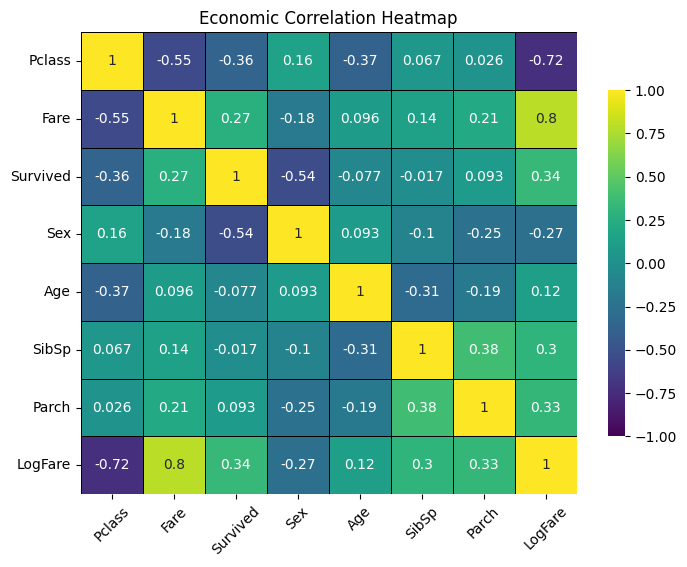

In [ ]:
dfEconomic = dfTrain[['Pclass', 'Fare', 'Survived', 'Sex', 'Age', 'SibSp', 'Parch']] #include all numeric fields as well as sex
dfEconomic['LogFare'] = np.log(dfEconomic['Fare'].replace(0, 1)) #logarithm of fare, replace fares of 0 with fares of 1 to avoid logarithm issues
def genderInt(x):
    if x == 'male':
        return 1
    else:
        return 0

dfEconomic['Sex'] = dfEconomic['Sex'].apply(genderInt) #convert sex to 0 for females and 1 for males
dfEconomic['Sex'] = pd.to_numeric(dfEconomic['Sex']) #turn the column into a numeric column

dfEconomicPairwise = dfEconomic.corr(numeric_only=False)

plt.figure(figsize=(8, 6))
sns.heatmap(dfEconomicPairwise, annot=True, cmap='viridis', vmin=-1, vmax=1, linewidths=0.5, linecolor='black', cbar_kws={"shrink": 0.75}) #hetmap with values
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.title('Economic Correlation Heatmap')
plt.show()

There is a strong correlation between a passenger's class and their fare, and an even stronger correlation with the logarithm of their fare. There is also a strong correlation between a passenger's gender and survival, with women being much more likely to survive.

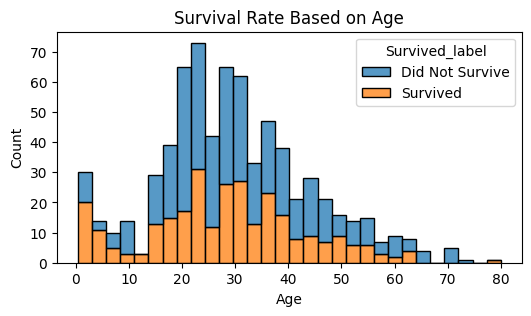

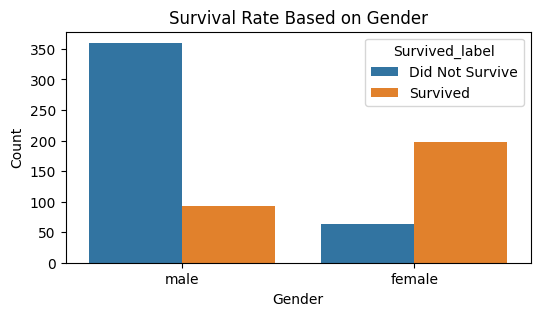

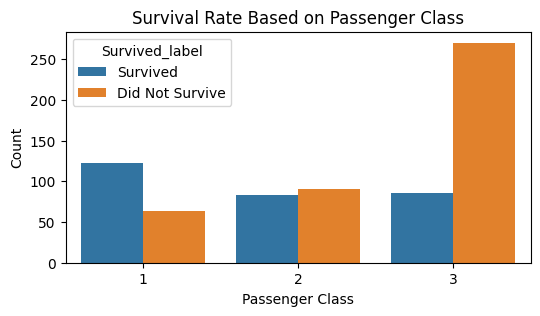

In [ ]:
survival_labels = {0: 'Did Not Survive', 1: 'Survived'}
dfTrain['Survived_label'] = dfTrain['Survived'].map(survival_labels) #use maps to turn numbers into statements
plt.figure(figsize=(6, 3))
sns.histplot(data=dfTrain, x='Age', hue='Survived_label', multiple='stack', bins=30)
plt.title('Survival Rate Based on Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Plot for Survival Rate Based on Gender
plt.figure(figsize=(6, 3))
sns.countplot(x='Sex', hue='Survived_label', data=dfTrain)
plt.title('Survival Rate Based on Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Plot for Survival Rate Based on Passenger Class
plt.figure(figsize=(6, 3))
sns.countplot(x='Pclass', hue='Survived_label', data=dfTrain)
plt.title('Survival Rate Based on Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

In [ ]:
dfTrainNumeric = dfTrain[['Pclass', 'Fare', 'Survived', 'Sex', 'Age', 'SibSp', 'Parch']]
dfTrainNumeric['Sex'] = dfTrainNumeric['Sex'].replace(['male', 'female'], [1, 0]) #convert gender to numeric
dfTrainNumeric.apply({'Sex': pd.to_numeric}, inplace=True)

dfAllMean = dfTrainNumeric.mean() #statistics of all
dfAllStdev = dfTrainNumeric.std()
dfAllMedian = dfTrainNumeric.median()
dfAllStats = pd.concat([dfAllMean, dfAllStdev, dfAllMedian], axis=1)
dfAllStats.columns = ['Mean', 'Stdev', 'Median']
dfAllStats = dfAllStats.drop('Survived')
print('All Stats')
print(dfAllStats)

dfSurvivors = dfTrainNumeric[dfTrainNumeric['Survived'] == 1] #statistics of surviors vs dead
dfDead = dfTrainNumeric[dfTrainNumeric['Survived'] == 0]
dfSurvivorsMean = dfSurvivors.mean()
dfDeadMean = dfDead.mean()
dfSurvivorsStdev = dfSurvivors.std()
dfDeadStdev = dfDead.std()
dfSurvivorsMedian = dfSurvivors.median()
dfDeadMedian = dfDead.median()
dfSurvivorsStats = pd.concat([dfSurvivorsMean, dfSurvivorsStdev, dfSurvivorsMedian], axis=1)
dfSurvivorsStats.columns = ['Mean', 'Stdev', 'Median']
dfDeadStats = pd.concat([dfDeadMean, dfDeadStdev, dfDeadMedian], axis=1)
dfDeadStats.columns = ['Mean', 'Stdev', 'Median']
dfSurvivorsStats = dfSurvivorsStats.drop('Survived')
dfDeadStats = dfDeadStats.drop('Survived')
print('Survivors Stats') #sex value represents percentage that are male
print(dfSurvivorsStats)
print('Dead Stats')
print(dfDeadStats)


All Stats
             Mean      Stdev   Median
Pclass   2.236695   0.838250   2.0000
Fare    34.694514  52.918930  15.7417
Sex      0.634454   0.481921   1.0000
Age     29.699118  14.526497  28.0000
SibSp    0.512605   0.929783   0.0000
Parch    0.431373   0.853289   0.0000
Survivors Stats
             Mean      Stdev  Median
Pclass   1.872414   0.836617    2.00
Fare    51.843205  70.458776   26.25
Sex      0.320690   0.467548    0.00
Age     28.343690  14.950952   28.00
SibSp    0.493103   0.731132    0.00
Parch    0.527586   0.807147    0.00
Dead Stats
             Mean      Stdev   Median
Pclass   2.485849   0.743633   3.0000
Fare    22.965456  31.448825  11.8875
Sex      0.849057   0.358417   1.0000
Age     30.626179  14.172110  28.0000
SibSp    0.525943   1.044760   0.0000
Parch    0.365566   0.878341   0.0000


<ipython-input-6-79cef346dde0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfTrainNumeric['Sex'] = dfTrainNumeric['Sex'].replace(['male', 'female'], [1, 0]) #convert gender to numeric


These statistics tell us that the average survivor was of a higher class, paid a higher fare, and had more parents / children aboard then the average non-survivor. The average survivor was also much more likely to be a female then a male. However, the average age and number of siblings / spouses aboard was about the same for both survivors and non-survivors.

In [ ]:
dfMale = dfTrainNumeric[dfTrainNumeric['Sex'] == 1] #statistics of male vs female
dfFemale = dfTrainNumeric[dfTrainNumeric['Sex'] == 0]
dfMaleMean = dfMale.mean()
dfFemaleMean = dfFemale.mean()
dfMaleStdev = dfMale.std()
dfFemaleStdev = dfFemale.std()
dfMaleMedian = dfMale.median()
dfFemaleMedian = dfFemale.median()
dfMaleStats = pd.concat([dfMaleMean, dfMaleStdev, dfMaleMedian], axis=1)
dfMaleStats.columns = ['Mean', 'Stdev', 'Median']
dfFemaleStats = pd.concat([dfFemaleMean, dfFemaleStdev, dfFemaleMedian], axis=1)
dfFemaleStats.columns = ['Mean', 'Stdev', 'Median']
dfMaleStats = dfMaleStats.drop('Sex')
dfFemaleStats = dfFemaleStats.drop('Sex')
print('Male Stats') #survival value represents percentage that survived
print(dfMaleStats)
print('Female Stats')
print(dfFemaleStats)

Male Stats
               Mean      Stdev  Median
Pclass     2.335541   0.818748     3.0
Fare      27.268836  45.841889    13.0
Survived   0.205298   0.404366     0.0
Age       30.726645  14.678201    29.0
SibSp      0.439294   0.923609     0.0
Parch      0.271523   0.651076     0.0
Female Stats
               Mean      Stdev  Median
Pclass     2.065134   0.845560     2.0
Fare      47.582759  61.346854    26.0
Survived   0.754789   0.431039     1.0
Age       27.915709  14.110146    27.0
SibSp      0.639847   0.928493     0.0
Parch      0.708812   1.066752     0.0


PART 2

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
dfTrain = pd.read_csv('train.csv')
dfTest = pd.read_csv('test.csv')
def preprocess(df):
    df.dropna(subset=['Age'], inplace=True) #drop null age
    df['Fare'].fillna(df['Fare'].median(), inplace=True) #replace null fare with median
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True) #replace null mbarked with most common
    df['Cabin'].fillna('Missing', inplace=True) #replace null cabin with missing
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1}) #map male and female to 1 and 0
    df['Fare'] = np.log(df['Fare'].replace(0, 1)) #logarithm of fare, replace fares of 0 with fares of 1 to avoid logarithm issues
    df = pd.get_dummies(df, columns=['Embarked'], drop_first=True) #dummy variables for embarked (1 if embarked 0 if not)
    return df

dfTrain = preprocess(dfTrain)
dfTest = preprocess(dfTest)

dfTrain = dfTrain.drop(columns=['Name', 'Ticket', 'Cabin', 'PassengerId'])
X_train = dfTrain.drop(columns=['Survived'])
y_train = dfTrain['Survived']

# Ensure 'Survived' column is not in test data
if 'Survived' in dfTest.columns:
    dfTest = dfTest.drop(columns=['Survived'])
X_test = dfTest.drop(columns=['Name', 'Ticket', 'Cabin', 'PassengerId'])

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

# Train models and make predictions on the test set
test_predictions = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    test_predictions[model_name] = model.predict(X_test)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Train models and make predictions on the validation set
val_predictions = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    val_predictions[model_name] = model.predict(X_val)

# Evaluate models on the validation set
evaluation_results = {}
for model_name, prediction in val_predictions.items():
    accuracy = accuracy_score(y_val, prediction)
    precision = precision_score(y_val, prediction)
    recall = recall_score(y_val, prediction)
    f1 = f1_score(y_val, prediction)
    evaluation_results[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }

# Print evaluation results on validation set
print("\nEvaluation on Validation Set:")
for model_name, metrics in evaluation_results.items():
    print(f"Model: {model_name}")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value}")
    print()


Evaluation on Validation Set:
Model: Logistic Regression
Accuracy: 0.7412587412587412
Precision: 0.6862745098039216
Recall: 0.625
F1 Score: 0.6542056074766356

Model: Decision Tree
Accuracy: 0.7062937062937062
Precision: 0.6206896551724138
Recall: 0.6428571428571429
F1 Score: 0.6315789473684211

Model: KNN
Accuracy: 0.7482517482517482
Precision: 0.75
Recall: 0.5357142857142857
F1 Score: 0.6250000000000001



In [ ]:
cross_val_results = {}
cross_val_scoring = {
    'acc': 'accuracy',
    'prec': 'precision',
    'rec': 'recall',
    'f1': 'f1'
}
for model_name, model in models.items():
    scores = cross_validate(model, X_train, y_train, cv=5, scoring=cross_val_scoring)
    cross_val_results[model_name] = {
        'Accuracy': scores['test_acc'].mean(),
        'Precision': scores['test_prec'].mean(),
        'Recall': scores['test_rec'].mean(),
        'F1 Score': scores['test_f1'].mean()
    }

# Print cross-validation results
print("\nCross-Validation Results:")
for model_name, metrics in cross_val_results.items():
    print(f"Model: {model_name}")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value}")
    print()


Cross-Validation Results:
Model: Logistic Regression
Accuracy: 0.8126468344774981
Precision: 0.7933471359558316
Recall: 0.7350601295097132
F1 Score: 0.7628282287074855

Model: Decision Tree
Accuracy: 0.7705873379099925
Precision: 0.7298765660110198
Recall: 0.7049028677150787
F1 Score: 0.7158101702219349

Model: KNN
Accuracy: 0.7635240274599542
Precision: 0.7721508521508522
Recall: 0.6067530064754856
F1 Score: 0.6776205625410292



In [ ]:
print("\nResult Deltas:")
for model_name, metrics in evaluation_results.items():
    print(f"Model: {model_name}")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {cross_val_results[model_name][metric_name] - value}") #subtract original values from cross validated values
    print()


Result Deltas:
Model: Logistic Regression
Accuracy: 0.07138809321875683
Precision: 0.10707262615191004
Recall: 0.11006012950971322
F1 Score: 0.10862262123084987

Model: Decision Tree
Accuracy: 0.0642936316162862
Precision: 0.10918691083860599
Recall: 0.0620457248579358
F1 Score: 0.08423122285351381

Model: KNN
Accuracy: 0.015272279208205952
Precision: 0.022150852150852218
Recall: 0.07103872076119988
F1 Score: 0.05262056254102909



Replacing Fare with the logarithm of Fare had little effect on Logistic Regresson and Decision Tree, but greatly improved KNN